In [3]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt

Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?
Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/stephaniepragassam/Documents_local/IRONHACK/Lab/WEEK_4/lab-eda-univariate/amz_uk_price_prediction_dataset.csv')

# Display the first few rows to understand the structure
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [9]:
# Generate a frequency table for product categories
category_freq = df['category'].value_counts()
category_freq


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

Which are the top 5 most listed product categories?

In [10]:
top_5_categories = category_freq.head(5)
top_5_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

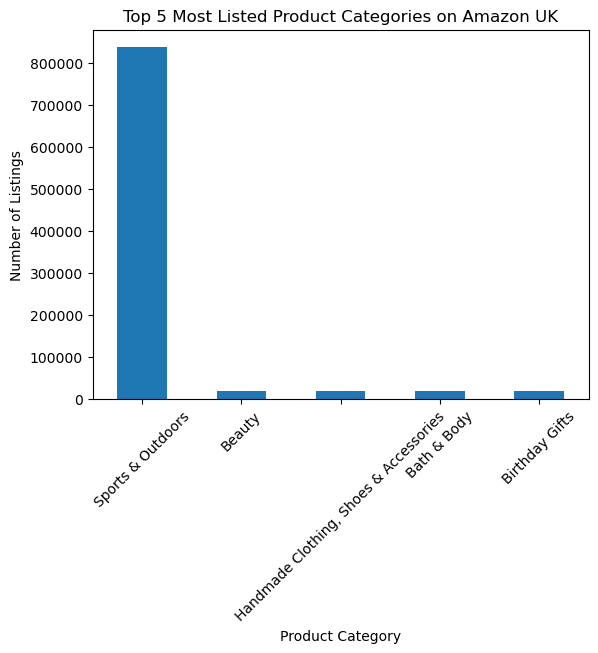

In [13]:
top_5_categories.plot(kind='bar')
plt.title('Top 5 Most Listed Product Categories on Amazon UK') #pour renom
plt.xlabel('Product Category')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

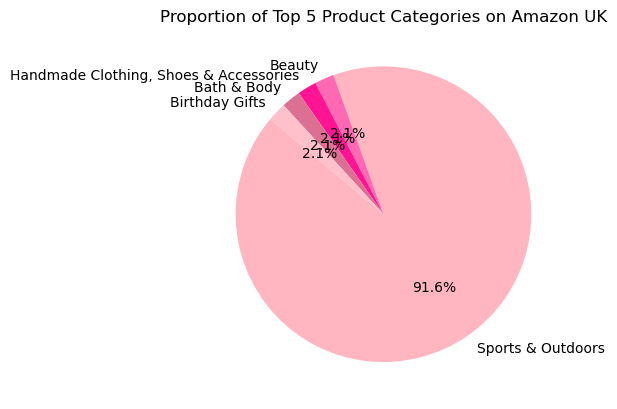

In [21]:

pink_colors = ['#FFB6C1', '#FF69B4', '#FF1493', '#DB7093', '#FFC0CB']
top_5_categories.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=pink_colors)
plt.title('Proportion of Top 5 Product Categories on Amazon UK')
plt.ylabel('')  # Hide the y-label as it's unnecessary for a pie chart
plt.show()

Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.


In [22]:
from scipy import stats

In [25]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

print(mean_price)
print(median_price)
print(mode_price)

89.24380943923663
19.09
9.99


The average price point (mean) of £89.24 possibly reflects the influence of high-priced outliers within the dataset.
The most common price point (mode) of £9.99 indicates that a significant number of products are priced around this lower value, making it the most frequent price encountered.
The disparity between the mean and mode, along with the relatively lower median, suggests a wide range of product prices on Amazon UK, with a substantial number of items clustered at lower price points and fewer, more expensive items stretching the average higher.

In [27]:
# Calculating measures of dispersion
import numpy as np
variance_price = df['price'].var()
std_deviation_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
q75, q25 = np.percentile(df['price'], [75 ,25])
iqr_price = q75 - q25

print(f"Variance: £{variance_price:.2f}")
print(f"Standard Deviation: £{std_deviation_price:.2f}")
print(f"Range: £{range_price:.2f}")
print(f"Interquartile Range (IQR): £{iqr_price:.2f}")

Variance: £119445.49
Standard Deviation: £345.61
Range: £100000.00
Interquartile Range (IQR): £36.00


In [31]:
# Summary statistics for the dataset
df['price'].describe().round(2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

The high variance and standard deviation signal that there's a significant spread in the prices of products listed on Amazon UK. This broad dispersion is confirmed by the massive range of prices.
However, the relatively smaller IQR compared to the range highlights that the central portion of the dataset—where most of the product prices fall—is much less varied. This could suggest that while most products are within a reasonable price range, there are a few extremely high-priced products that dramatically increase the overall spread.
Given the disparity between the mean, median, and mode, along with the measures of dispersion, it's clear that the prices are highly varied with distinct high-price outliers influencing the overall distribution significantly.

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


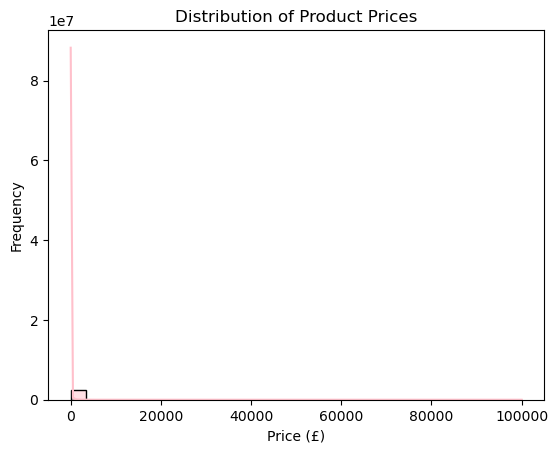

In [35]:
sns.histplot(df['price'], bins=30, kde=True, color='pink')
plt.title('Distribution of Product Prices')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.show()

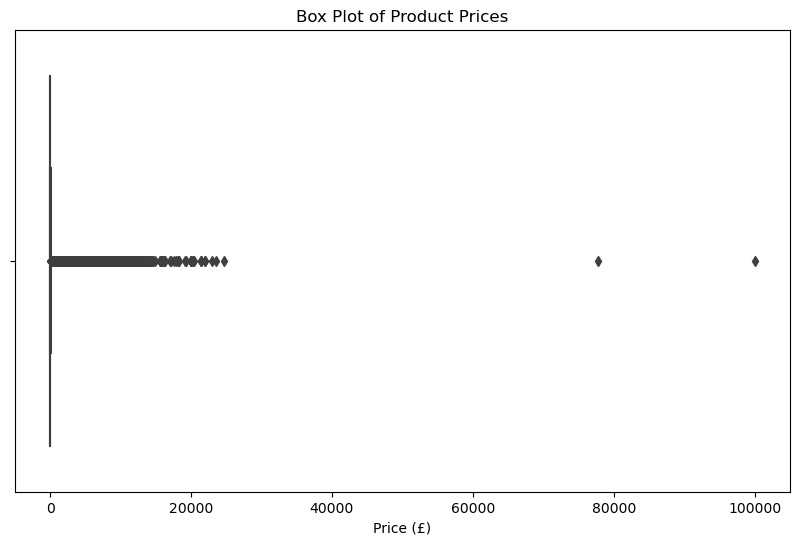

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Product Prices')
plt.xlabel('Price (£)')
plt.show()

Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


In [42]:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

print(mean_rating)
print(median_rating)
print(mode_rating)

2.152836472966065
0.0
0.0


A Large Number of Unrated Products: The significant indicator here is the high number of products with a rating of 0, both in terms of the most common rating (mode) and the midpoint of the data (median). This could mean that many products on the platform haven't been reviewed at all, which might result from a vast inventory where many items escape customer attention or new products yet to be reviewed.

Average Ratings are Low: The relatively low mean rating (compared to a typical maximum of 5 or 10) suggests that among products which are rated, the overall customer satisfaction might be moderate to low. This could reflect on the quality of products, customer expectations, or perhaps the tendency of customers to leave reviews more often when dissatisfied.

In [46]:
variance_rating = df['stars'].var()
std_deviation_rating = df['stars'].std()
range_rating = df['stars'].max() - df['stars'].min()
q75, q25 = np.percentile(df['stars'], [75 ,25])
iqr_rating = q75 - q25

print(f"Variance: {variance_rating:.2f}")
print(f"Standard Deviation: {std_deviation_rating:.2f}")
print(f"Range: {range_rating:.2f}")
print(f"Interquartile Range (IQR): {iqr_rating:.2f}")

Variance: 4.82
Standard Deviation: 2.19
Range: 5.00
Interquartile Range (IQR): 4.40


In [49]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

Skewness = 0.0812: This value is very close to 0, indicating that the distribution of ratings is nearly symmetrical. The slight positive value hints at a minor tail extending towards higher ratings, but the effect is so marginal it can be considered as almost negligible for practical interpretation.

Kurtosis = -1.926: This value indicates a distribution with lighter tails and a flatter peak than a normal distribution (since the normal distribution's kurtosis is 3, the reported value is often the excess kurtosis which would be even more negative here). Fewer extreme values (both low and high) are present than you’d expect in a normal distribution.

The ratings are nearly symmetrical, with a very slight lean towards higher values, as suggested by the skewness near zero but slightly positive.

The distribution has a flatter peak and lighter tails than a normal distribution, as implied by the negative kurtosis. This suggests that the ratings do not have pronounced extremes (very high or very low ratings) to the extent expected in a normal bell curve, and extreme opinions (both positively and negatively about products) are lesser than in a normal distribution.

In summary, the ratings are fairly symmetrically distributed with a tendency towards neither higher nor lower values, suggesting that ratings are somewhat uniformly spread out across the available scale but with fewer outliers than a normally distributed set of data would have. This scenario indicates a balanced range of customer feedback without significant bias towards satisfaction or dissatisfaction extremes

/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

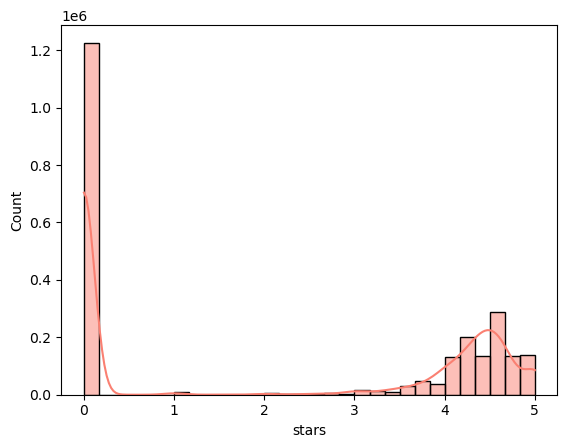

In [50]:
sns.histplot(df['stars'], kde=True, bins=30, color="salmon")